<a href="https://colab.research.google.com/github/pkydv01/JustWatch_Web_Scrapping/blob/main/Numerical_Programming_in_Python_Web_Scraping(M2_Assignment_Pappu_kumar_Yada).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [ ]:
#Installing all necessary labraries
!pip install bs4
!pip install requests
!pip install HTMLParser
!pip install wordcloud

In [ ]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [ ]:

# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

header= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}

response= requests.get(url, headers=header)

if response.status_code == 200:
    print("Request Successful")
    html_content= response.text
    soup = BeautifulSoup(response.text, 'html.parser')
else:
    print("Request Failed")
print(response.status_code)

print(soup.prettify)

Request Successful
200
<bound method Tag.prettify of <!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en"><head><meta charset="utf-8"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta charset="utf-8" data-vue-meta="ssr"/><meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/><meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/><meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/><meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/><meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/><meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/><meta content="302" data-vmid="og:image:height" da

## **Fetching Movie URL's**

In [ ]:
# Write Your Code here
Movie_url  =[]
movies_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in movies_link:
    movie_url = "https://www.justwatch.com"+link["href"]
    Movie_url.append(movie_url)
# print (Movie_url)
print(len(Movie_url))
Movie_url



100


['https://www.justwatch.com/in/movie/chaava',
 'https://www.justwatch.com/in/movie/anora',
 'https://www.justwatch.com/in/movie/marco-2024',
 'https://www.justwatch.com/in/movie/pushpa-the-rule-part-2',
 'https://www.justwatch.com/in/movie/mon-potongo',
 'https://www.justwatch.com/in/movie/sankrathiki-vasthunam',
 'https://www.justwatch.com/in/movie/rekhachithram',
 'https://www.justwatch.com/in/movie/365-days',
 'https://www.justwatch.com/in/movie/game-changer-2023',
 'https://www.justwatch.com/in/movie/mufasa-the-lion-king',
 'https://www.justwatch.com/in/movie/dragon-2025',
 'https://www.justwatch.com/in/movie/officer-on-duty',
 'https://www.justwatch.com/in/movie/the-gorge',
 'https://www.justwatch.com/in/movie/mrs',
 'https://www.justwatch.com/in/movie/deva-2024',
 'https://www.justwatch.com/in/movie/stree-2',
 'https://www.justwatch.com/in/movie/kudumbasthan',
 'https://www.justwatch.com/in/movie/the-substance',
 'https://www.justwatch.com/in/movie/max-2024',
 'https://www.justwa

## **Scrapping Movie Title**

In [ ]:
# Write Your Code here
Movie_Title =[]

for url in Movie_url:
  title= url.split("/")[-1]
  Movie_Title.append(title)


# print(Movie_Title)
print(len(Movie_Title))
Movie_Title

100


['chaava',
 'anora',
 'marco-2024',
 'pushpa-the-rule-part-2',
 'mon-potongo',
 'sankrathiki-vasthunam',
 'rekhachithram',
 '365-days',
 'game-changer-2023',
 'mufasa-the-lion-king',
 'dragon-2025',
 'officer-on-duty',
 'the-gorge',
 'mrs',
 'deva-2024',
 'stree-2',
 'kudumbasthan',
 'the-substance',
 'max-2024',
 'manamey',
 'vidaamuyarchi',
 'untitled-murad-khetani-varun-dhawan-project',
 'sky-force',
 'kraven-the-hunter',
 'companion-2025',
 'nosferatu-2023',
 'ponman',
 'gladiator-2',
 'flow-2024',
 'thandel',
 'trauma-2017',
 'the-brutalist',
 'the-wild-robot',
 'sanam-teri-kasam',
 'interstellar',
 'babygirl-2024',
 'agent',
 'daaku-maharaaj',
 'the-gangster-the-cop-the-devil',
 'nilavuku-en-mel-ennadi-kobam',
 'moana-2',
 'conclave',
 'superboys-of-malegaon',
 'the-electric-state',
 'lucky-baskhar',
 'captain-america-new-world-order',
 'dangal',
 'fateh-2025',
 'tumbbad',
 'heretic',
 'emergency-2023',
 'le-comte-de-monte-cristo',
 'the-diplomat',
 'a-real-pain',
 'the-dictator'

## **Scrapping release Year**

In [ ]:
# Write Your Code here
Movie_Release_year =[]
for url in Movie_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  release_year = soup.select_one('.release-year')

  if release_year:
    Movie_Release_year.append(release_year.text.strip().strip("()"))
  else:
    print("None")

print(len(Movie_Release_year))

Movie_Release_year



100


['2025',
 '2024',
 '2024',
 '2024',
 '2024',
 '2025',
 '2025',
 '2020',
 '2025',
 '2024',
 '2025',
 '2025',
 '2025',
 '2023',
 '2025',
 '2024',
 '2025',
 '2024',
 '2024',
 '2024',
 '2025',
 '2024',
 '2025',
 '2024',
 '2025',
 '2024',
 '2025',
 '2024',
 '2024',
 '2025',
 '2017',
 '2024',
 '2024',
 '2016',
 '2014',
 '2024',
 '2023',
 '2025',
 '2019',
 '2025',
 '2024',
 '2024',
 '2025',
 '2025',
 '2024',
 '2025',
 '2016',
 '2025',
 '2018',
 '2024',
 '2025',
 '2024',
 '2025',
 '2024',
 '2012',
 '2024',
 '2024',
 '2024',
 '2025',
 '2025',
 '2024',
 '2024',
 '2014',
 '2025',
 '2024',
 '2021',
 '2013',
 '2013',
 '2017',
 '2024',
 '2025',
 '2025',
 '2021',
 '2025',
 '2025',
 '2021',
 '2025',
 '2025',
 '2008',
 '2023',
 '2024',
 '2024',
 '2024',
 '2025',
 '2015',
 '2025',
 '2022',
 '2024',
 '2023',
 '2025',
 '2025',
 '2024',
 '2024',
 '2024',
 '2024',
 '2024',
 '2025',
 '2024',
 '2024',
 '2015']

## **Scrapping Genres**

In [ ]:
# Write Your Code here
Movie_Genres =[]
for url in Movie_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  genre_section= soup.find_all('h3', class_="poster-detail-infos__subheading")
  for genre in genre_section:
    if 'Genres' in genre.text:
      genre_element = genre.find_next('div', class_="poster-detail-infos__value")
      if genre_element:
        Movie_Genres.append(genre_element.text)
      else:
        Movie_Genres.append("None")
print(len(Movie_Genres))
Movie_Genres

100


['Drama, History, Action & Adventure',
 'Romance, Comedy, Drama',
 'Action & Adventure, Crime, Mystery & Thriller',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Drama, Romance',
 'Comedy, Action & Adventure',
 'Drama, Mystery & Thriller, Crime',
 'Drama, Romance, Made in Europe',
 'Action & Adventure, Drama, Mystery & Thriller',
 'Drama, Kids & Family, Fantasy, Animation, Action & Adventure',
 'Comedy, Drama, Romance',
 'Mystery & Thriller',
 'Mystery & Thriller, Romance, Science-Fiction, Horror, Action & Adventure',
 'Drama, Comedy',
 'Action & Adventure, Mystery & Thriller',
 'Comedy, Horror',
 'Drama, Comedy',
 'Drama, Horror, Science-Fiction, Comedy',
 'Action & Adventure, Drama',
 'Drama, Comedy',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Mystery & Thriller, Crime, Action & Adventure, Drama',
 'Mystery & Thriller, Action & Adventure',
 'Mystery & Thriller, Action & Adventure',
 'Science-Fiction, Mystery & Thriller, Comedy, Horror',
 'Fantasy, Horror',
 'Com

## **Scrapping IMBD Rating**

In [ ]:
# Write Your Code here
IMDB_Movie_Rating =[]
for url in Movie_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  rating= soup.find_all('div', class_='jw-scoring-listing__rating--group jw-scoring-listing__rating--link')
  for rate in rating:
    IMDB_Movie_Rating.append(rate.text.strip()[0:3])
print(len(IMDB_Movie_Rating))
IMDB_Movie_Rating

100


['7.8',
 '7.6',
 '6.9',
 '6.1',
 '6.8',
 '6.3',
 '8.0',
 '3.3',
 '5.5',
 '6.6',
 '8.1',
 '7.6',
 '6.7',
 '6.7',
 '7.3',
 '6.9',
 '7.5',
 '7.3',
 '7.1',
 '5.5',
 '6.5',
 '5.4',
 '7.0',
 '5.4',
 '7.0',
 '7.3',
 '7.5',
 '6.5',
 '7.9',
 '5.9',
 '4.8',
 '7.5',
 '8.2',
 '7.6',
 '8.7',
 '6.0',
 '4.0',
 '6.0',
 '7.0',
 '5.9',
 '6.7',
 '7.4',
 '8.0',
 '6.0',
 '8.0',
 '5.9',
 '8.3',
 '6.6',
 '8.2',
 '7.0',
 '5.2',
 '7.6',
 '8.0',
 '7.1',
 '6.5',
 '7.1',
 '5.6',
 '6.7',
 '6.4',
 '7.0',
 '6.0',
 '4.7',
 '4.8',
 '2.7',
 '6.9',
 '8.0',
 '8.2',
 '8.2',
 '4.8',
 '6.7',
 '7.9',
 '6.8',
 '7.6',
 '7.9',
 '5.1',
 '7.6',
 '8.2',
 '3.0',
 '7.8',
 '8.3',
 '7.5',
 '5.6',
 '8.8',
 '7.5',
 '4.2',
 '5.4',
 '8.2',
 '4.8',
 '6.6',
 '6.2',
 '5.8',
 '8.0',
 '6.9',
 '5.4',
 '7.8',
 '8.5',
 '4.7',
 '7.4',
 '8.4',
 '7.3']

## **Scrapping Runtime/Duration**

In [ ]:
# Write Your Code here
Movie_Runtime =[]
for url in Movie_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  runtime=soup.find_all('h3', class_='poster-detail-infos__subheading')
  for run in runtime:
    if 'Runtime' in run.text:
      runtime_element = run.find_next('div', class_="poster-detail-infos__value")
      if runtime_element:
        Movie_Runtime.append(runtime_element.text)
print(len(Movie_Runtime))
Movie_Runtime

100


['2h 41min',
 '2h 19min',
 '2h 25min',
 '3h 21min',
 '2h 29min',
 '2h 40min',
 '2h 27min',
 '1h 54min',
 '2h 44min',
 '1h 58min',
 '2h 37min',
 '2h 14min',
 '2h 7min',
 '1h 51min',
 '2h 36min',
 '2h 27min',
 '2h 33min',
 '2h 21min',
 '2h 12min',
 '2h 33min',
 '2h 34min',
 '2h 42min',
 '2h 5min',
 '2h 7min',
 '1h 37min',
 '2h 13min',
 '2h 5min',
 '2h 28min',
 '1h 25min',
 '2h 32min',
 '1h 46min',
 '3h 35min',
 '1h 42min',
 '2h 34min',
 '2h 49min',
 '1h 54min',
 '2h 35min',
 '2h 30min',
 '1h 50min',
 '2h 11min',
 '1h 39min',
 '2h 0min',
 '2h 7min',
 '2h 8min',
 '2h 28min',
 '1h 58min',
 '2h 41min',
 '2h 8min',
 '1h 53min',
 '1h 51min',
 '2h 27min',
 '2h 58min',
 '2h 10min',
 '1h 30min',
 '1h 23min',
 '1h 59min',
 '1h 34min',
 '2h 7min',
 '1h 49min',
 '2h 17min',
 '1h 49min',
 '2h 38min',
 '1h 27min',
 '2h 14min',
 '1h 50min',
 '2h 35min',
 '3h 0min',
 '3h 6min',
 '1h 28min',
 '2h 40min',
 '2h 28min',
 '1h 51min',
 '2h 59min',
 '1h 34min',
 '2h 14min',
 '2h 30min',
 '2h 24min',
 '1h 59min

## **Scrapping Age Rating**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

Movie_Age_Rating = []

for url in Movie_url:
    response = requests.get(url, headers=header)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Find only the "Age rating" heading
    age_rating_heading = soup.find('h3', class_='poster-detail-infos__subheading', string="Age rating")

    if age_rating_heading:
        # Get the next sibling div containing the rating value
        age_rating_element = age_rating_heading.find_next('div', class_="poster-detail-infos__value")
        if age_rating_element:
            Movie_Age_Rating.append(age_rating_element.text.strip())
        else:
            Movie_Age_Rating.append("None")  # No rating found
    else:
        Movie_Age_Rating.append("None")  # "Age rating" heading not found

print(len(Movie_Age_Rating))
print(Movie_Age_Rating)


100
['None', 'A', 'A', 'UA', 'A', 'UA', 'UA', 'None', 'None', 'U', 'None', 'UA', 'None', 'None', 'None', 'UA', 'U', 'None', 'None', 'UA', 'None', 'None', 'None', 'A', 'A', 'A', 'UA', 'None', 'U', 'None', 'None', 'A', 'U', 'UA', 'UA', 'A', 'UA', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'UA', 'None', 'U', 'A', 'A', 'None', 'A', 'None', 'None', 'A', 'A', 'None', 'None', 'None', 'None', 'A', 'None', 'UA', 'None', 'None', 'None', 'UA', 'A', 'U', 'None', 'UA', 'A', 'UA', 'UA', 'None', 'None', 'UA', 'None', 'None', 'None', 'UA', 'None', 'UA', 'None', 'UA', 'None', 'None', 'UA', 'None', 'A', 'None', 'None', 'A', 'UA', 'A', 'UA', 'UA', 'None', 'A', 'None', 'U']


## **Fetching Production Countries Details**

In [ ]:
# Write Your Code here
Movie_Production_country=[]
for url in Movie_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  production_country= soup.find_all('h3', class_='poster-detail-infos__subheading')
  for country in production_country:
    if 'Production country' in country.text:
      production_country_element = country.find_next('div', class_="poster-detail-infos__value")
      if production_country_element:
        Movie_Production_country.append(production_country_element.text)
      else:
        Movie_Production_country.append("None")

print(len(Movie_Production_country))
Movie_Production_country

100


['India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'India',
 'Poland',
 'India',
 'United States',
 'India',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'India',
 'United Kingdom, France',
 'India',
 'India',
 'India',
 'India',
 'India',
 'United States',
 'United States',
 'United States',
 'India',
 'United States, United Kingdom, Morocco, Canada, Malta',
 'Belgium, France, Latvia',
 'India',
 'Chile',
 'United Kingdom, United States',
 'Japan, United States',
 'India',
 'United States, United Kingdom, Canada',
 'Netherlands, United States',
 'India',
 'India',
 'South Korea',
 'India',
 'Canada, United States',
 'United Kingdom, United States',
 'India',
 'United States',
 'India',
 'United States, Canada',
 'India, United States',
 'India',
 'India, Sweden',
 'United States, Canada',
 'India',
 'Belgium, France',
 'India',
 'Poland, United States',
 'United States',
 'France, India, Norway',
 'Canada',
 'United States',
 'India',
 'United States, U

## **Fetching Streaming Service Details**

In [ ]:
# Write Your Code here
import requests
from bs4 import BeautifulSoup

Movie_Streaming_Service1 = []

for url in Movie_url:
    response = requests.get(url, headers=header)
    soup = BeautifulSoup(response.text, "html.parser")

    stream_container = soup.find_all('div', class_='buybox buybox-selector')

    stream_list = []  # Reset for each URL

    for stream in stream_container:
        stream_service = stream.find_all('div', class_='picture-wrapper')

        if stream_service:
            for service in stream_service:
                stream_name = service.find('img', class_="provider-icon wide icon")
                if stream_name:
                    stream_list.append(stream_name.get('title'))  # Append provider name
                else:
                    stream_list.append("None")
        else:
            stream_list.append("None")  # If no providers are found

    # Remove duplicates within each list before appending
    Movie_Streaming_Service1.append(list(set(stream_list)))

# Print the correct count
print(len(Movie_Streaming_Service1))
print(Movie_Streaming_Service1)


100
[['Amazon Prime Video', 'Bookmyshow'], ['Amazon Video', 'Zee5', 'JioHotstar', 'Amazon Prime Video'], ['Sony Liv', 'aha', 'Amazon Prime Video'], ['Netflix', 'Amazon Prime Video'], ['Amazon Prime Video'], ['Zee5', 'Amazon Prime Video'], ['Sony Liv', 'aha', 'Amazon Prime Video'], ['Netflix', 'Amazon Prime Video'], ['Zee5', 'Amazon Prime Video', 'Amazon Video'], ['Apple TV', 'YouTube', 'Amazon Prime Video', 'Google Play Movies', 'JioHotstar', 'Bookmyshow'], ['Netflix', 'Amazon Prime Video'], ['Amazon Prime Video', 'Netflix', 'Bookmyshow'], ['Apple TV+', 'Amazon Prime Video'], ['Zee5', 'Amazon Prime Video'], ['Amazon Prime Video', 'Bookmyshow'], ['Amazon Prime Video', 'Amazon Video'], ['Amazon Prime Video', 'Zee5', 'Bookmyshow'], ['MUBI', 'MUBI Amazon Channel', 'Amazon Prime Video', 'Amazon Video'], ['Zee5', 'Amazon Prime Video'], ['Amazon Prime Video'], ['Netflix', 'Amazon Prime Video'], ['Amazon Prime Video', 'Amazon Video'], ['Amazon Prime Video', 'Amazon Video'], ['Apple TV', 'Zee5'

## **Now Creating Movies DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
dict={"Title":Movie_Title,
      "URL":Movie_url,
      "Release_year":Movie_Release_year,
      "Genres":Movie_Genres,
      "IMDB_Rating":IMDB_Movie_Rating,
      "Age_Rating":Movie_Age_Rating,
      "Streaming_Service":Movie_Streaming_Service1,
      "Runtime":Movie_Runtime,
      "Production_country":Movie_Production_country,
      "Type":'Movie'
    }
Movie_df= pd.DataFrame(dict)
Movie_df.head()

Title                                                URL  \
0                  chaava          https://www.justwatch.com/in/movie/chaava   
1                   anora           https://www.justwatch.com/in/movie/anora   
2              marco-2024      https://www.justwatch.com/in/movie/marco-2024   
3  pushpa-the-rule-part-2  https://www.justwatch.com/in/movie/pushpa-the-...   
4             mon-potongo     https://www.justwatch.com/in/movie/mon-potongo   

  Release_year                                             Genres IMDB_Rating  \
0         2025                 Drama, History, Action & Adventure         7.8   
1         2024                             Romance, Comedy, Drama         7.6   
2         2024      Action & Adventure, Crime, Mystery & Thriller         6.9   
3         2024  Action & Adventure, Crime, Drama, Mystery & Th...         6.1   
4         2024                                     Drama, Romance         6.8   

  Age_Rating                                  Streaming_Service   Runtime  \
0       None                   [Amazon Prime Video, Bookmyshow]  2h 41min   
1          A  [Amazon Video, Zee5, JioHotstar, Amazon Prime ...  2h 19min   
2          A                [Sony Liv, aha, Amazon Prime Video]  2h 25min   
3         UA                      [Netflix, Amazon Prime Video]  3h 21min   
4          A                               [Amazon Prime Video]  2h 29min   

  Production_country   Type  
0              India  Movie  
1      United States  Movie  
2              India  Movie  
3              India  Movie  
4              India  Movie

## **Scraping TV  Show Data**

In [ ]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
header= {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Safari/537.36'}
page=requests.get(tv_url, headers=header)
# Checking if the request was successful (status code 200
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [ ]:
# Write Your Code here
Tv_show_url  =[]
tv_show_link = soup.find_all("a",class_="title-list-grid__item--link")
for link in tv_show_link:
    tv_show_url = "https://www.justwatch.com"+link["href"]
    Tv_show_url.append(tv_show_url)

print(len(Tv_show_url))
Tv_show_url


100


['https://www.justwatch.com/in/tv-show/solo-leveling-2024',
 'https://www.justwatch.com/in/tv-show/jack-reacher',
 'https://www.justwatch.com/in/tv-show/aashram',
 'https://www.justwatch.com/in/tv-show/adolescence-2025',
 'https://www.justwatch.com/in/tv-show/auto-shankar',
 'https://www.justwatch.com/in/tv-show/suzhal-the-vortex',
 'https://www.justwatch.com/in/tv-show/attack-on-titan',
 'https://www.justwatch.com/in/tv-show/the-day-of-the-jackal',
 'https://www.justwatch.com/in/tv-show/the-white-lotus',
 'https://www.justwatch.com/in/tv-show/from',
 'https://www.justwatch.com/in/tv-show/squid-game',
 'https://www.justwatch.com/in/tv-show/severance',
 'https://www.justwatch.com/in/tv-show/daredevil-born-again',
 'https://www.justwatch.com/in/tv-show/paatal-lok',
 'https://www.justwatch.com/in/tv-show/game-of-thrones',
 'https://www.justwatch.com/in/tv-show/dabba-cartel',
 'https://www.justwatch.com/in/tv-show/paradise-2025',
 'https://www.justwatch.com/in/tv-show/thukra-ke-mera-pyaar'

## **Fetching Tv Show Title details**

In [ ]:
# Write Your Code here
Tv_show_Title =[]

for url in Tv_show_url:
  response1= requests.get(url, headers=header)
  soup = BeautifulSoup(response1.text, 'html.parser')
  title= soup.find_all('h1',class_='title-detail-hero__details__title')
  for name in title:
    if name.text:
     Tv_show_Title.append(name.text.strip()[:-6])
    else:
      Tv_show_Title.append("None")

print(len(Tv_show_Title))
Tv_show_Title

100


['Solo Leveling ',
 'Reacher ',
 'Aashram ',
 'Adolescence ',
 'Auto Shankar ',
 'Suzhal - The Vortex ',
 'Attack on Titan ',
 'The Day of the Jackal ',
 'The White Lotus ',
 'From ',
 'Squid Game ',
 'Severance ',
 'Daredevil: Born Again ',
 'Paatal Lok ',
 'Game of Thrones ',
 'Dabba Cartel ',
 'Paradise ',
 'Thukra Ke Mera Pyaar ',
 'MTV Roadies ',
 'Dupahiya ',
 'INVINCIBLE ',
 'Mastram ',
 'Newtopia ',
 'Farzi ',
 'Mirzapur ',
 'The First Frost ',
 'Buried Hearts ',
 'The Rookie ',
 'Pyar Ka Professor ',
 'Zero Day ',
 'Suits LA ',
 'Demon Slayer: Kimetsu no Yaiba ',
 'The Wheel of Time ',
 'Breaking Bad ',
 'Naruto ',
 'When Life Gives You Tangerines ',
 'House of David ',
 'Naruto Shippūden ',
 'High Potential ',
 'Sherlock ',
 'Panchayat ',
 'Mismatched ',
 'The Pitt ',
 'The Rain in España ',
 'The Penguin ',
 'She ',
 "Marvel's Daredevil ",
 'Hidden Love ',
 'Murshid ',
 'Jujutsu Kaisen ',
 'The Village ',
 'Laughter Chefs Unlimited Entertainment ',
 'Sakamoto Days ',
 'Aphar

## **Fetching Release Year**

In [ ]:
# Write Your Code here
Tv_show_Release_year =[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  release_year = soup.find_all('span', class_='release-year')
  for year in release_year:
    Tv_show_Release_year.append(year.text.strip().strip("()"))

print(len(Tv_show_Release_year))
Tv_show_Release_year


100


['2024',
 '2022',
 '2020',
 '2025',
 '2019',
 '2022',
 '2013',
 '2024',
 '2021',
 '2022',
 '2021',
 '2022',
 '2025',
 '2020',
 '2011',
 '2025',
 '2025',
 '2024',
 '2003',
 '2025',
 '2021',
 '2020',
 '2025',
 '2023',
 '2018',
 '2025',
 '2025',
 '2018',
 '2025',
 '2025',
 '2025',
 '2019',
 '2021',
 '2008',
 '2002',
 '2025',
 '2025',
 '2007',
 '2024',
 '2010',
 '2020',
 '2020',
 '2025',
 '2023',
 '2024',
 '2020',
 '2015',
 '2023',
 '2024',
 '2020',
 '2023',
 '2024',
 '2025',
 '2018',
 '2021',
 '2010',
 '2010',
 '2019',
 '2017',
 '2024',
 '2018',
 '2020',
 '2023',
 '2017',
 '2018',
 '2022',
 '2019',
 '2014',
 '2016',
 '2019',
 '2023',
 '2019',
 '2024',
 '2019',
 '2023',
 '2019',
 '2024',
 '2016',
 '2020',
 '2020',
 '2019',
 '2023',
 '2025',
 '2022',
 '2011',
 '2025',
 '2018',
 '2017',
 '2017',
 '2009',
 '2024',
 '2025',
 '2025',
 '2022',
 '2006',
 '2010',
 '2018',
 '2013',
 '2017',
 '2013']

## **Fetching TV Show Genre Details**

In [ ]:
# Write Your Code here
Tv_show_Genres =[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  genre_section= soup.find_all('h3', class_='poster-detail-infos__subheading',string="Genres")
  for heading in genre_section:
    genre_value = heading.find_next_sibling()  # This finds the next element (where genres are stored)
    if genre_value:
      Tv_show_Genres.append(genre_value.text.strip())
    else:
        Tv_show_Genres.append("None")


print(len(Tv_show_Genres))
Tv_show_Genres

# Tv_show_Genres

100


['Action & Adventure, Science-Fiction, Animation, Fantasy',
 'Action & Adventure, Drama, Mystery & Thriller, Crime',
 'Mystery & Thriller, Crime, Drama',
 'Drama, Crime, Mystery & Thriller',
 'Crime, Mystery & Thriller',
 'Crime, Drama, Fantasy, Mystery & Thriller',
 'Action & Adventure, Drama, Fantasy, Horror, Animation, Science-Fiction',
 'Action & Adventure, Crime, Drama, Mystery & Thriller',
 'Comedy, Drama, Mystery & Thriller',
 'Horror, Science-Fiction, Mystery & Thriller, Drama',
 'Action & Adventure, Mystery & Thriller, Drama',
 'Science-Fiction, Drama, Mystery & Thriller',
 'Drama, Crime, Action & Adventure, Fantasy, Science-Fiction, Mystery & Thriller',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Action & Adventure, Science-Fiction, Drama, Fantasy',
 'Drama, Crime',
 'Crime, Drama, Mystery & Thriller, Action & Adventure',
 'Drama, Romance',
 'Reality TV, Action & Adventure',
 'Comedy, Drama',
 'Animation, Science-Fiction, Action & Adventure, Drama, Fantasy, Mys

## **Fetching IMDB Rating Details**

In [ ]:
# Write Your Code here
Tv_show_IMDB_Rating =[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  rating= soup.find_all('div', class_='jw-scoring-listing__rating--group jw-scoring-listing__rating--link')
  if rating:
    for rate in rating:
      Tv_show_IMDB_Rating.append(rate.text.strip()[0:3])
  else:
      Tv_show_IMDB_Rating.append("None")

print(len(Tv_show_IMDB_Rating))
Tv_show_IMDB_Rating

100


['8.5',
 '8.0',
 '6.6',
 '8.4',
 '6.8',
 '8.1',
 '9.1',
 '8.2',
 '8.0',
 '7.8',
 '8.0',
 '8.7',
 '8.7',
 '8.2',
 '9.2',
 '7.1',
 '8.0',
 '6.6',
 '4.4',
 '7.4',
 '8.7',
 '6.8',
 '6.7',
 '8.3',
 '8.4',
 '8.5',
 '7.9',
 '8.0',
 '7.3',
 '7.0',
 '5.5',
 '8.6',
 '7.2',
 '9.5',
 '8.4',
 'None',
 '7.0',
 '8.7',
 '7.6',
 '9.1',
 '9.0',
 '5.9',
 '8.7',
 '7.5',
 '8.6',
 '6.4',
 '8.6',
 'None',
 '7.3',
 '8.5',
 '5.4',
 '8.8',
 '7.5',
 '8.2',
 '7.7',
 '8.5',
 '5.3',
 '8.6',
 '8.2',
 '6.8',
 '3.4',
 '7.7',
 '7.5',
 '8.7',
 '8.6',
 '8.3',
 '8.3',
 '8.9',
 '8.0',
 '8.1',
 '8.1',
 '8.7',
 '7.4',
 '7.9',
 '8.1',
 '7.8',
 'None',
 '8.6',
 '7.4',
 '6.5',
 '7.6',
 '8.7',
 '5.1',
 '8.3',
 '8.4',
 '6.1',
 '4.8',
 '7.6',
 '8.2',
 '8.5',
 '7.0',
 '7.6',
 '6.9',
 '8.1',
 '3.6',
 '8.1',
 '8.4',
 '8.7',
 '6.4',
 '6.5']

## **Fetching Age Rating Details**

In [ ]:
# Write Your Code here
Tv_show_Age_Rating =[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  age_rating= soup.find_all('h3', class_='poster-detail-infos__subheading', string="Age rating")
  if age_rating:
    for age in age_rating:
      rating = age.find_next_sibling()  # This finds the next element (where genres are stored)
      if rating:
        Tv_show_Age_Rating.append(rating.text.strip())
  else:
        Tv_show_Age_Rating.append("None")
print(len(Tv_show_Age_Rating))
Tv_show_Age_Rating

100


['None',
 'A',
 'None',
 'None',
 'UA',
 'None',
 'UA',
 'None',
 'None',
 'None',
 'A',
 'A',
 'None',
 'None',
 'U',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'A',
 'None',
 'None',
 'None',
 'A',
 'None',
 'None',
 'None',
 'A',
 'A',
 'None',
 'None',
 'None',
 'U',
 'None',
 'U',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'A',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'A',
 'None',
 'None',
 'A',
 'None',
 'None',
 'None',
 'None',
 'None',
 'A',
 'U',
 'U',
 'None',
 'A',
 'None',
 'None',
 'A',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'None',
 'A',
 'A',
 'A',
 'None',
 'A',
 'None',
 'A',
 'None',
 'None',
 'A',
 'None',
 'None',
 'A',
 'None',
 'U',
 'None',
 'A',
 'None',
 'None']

## **Fetching Production Country details**

In [ ]:
# Write Your Code here
Tv_show_Production_country=[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  production_country= soup.find_all('h3', class_='poster-detail-infos__subheading', string="Production country")
  if production_country:
    for country in production_country:
      country= country.find_next_sibling()  # This finds the next element (where genres are stored)
      if country:
        Tv_show_Production_country.append(country.text.strip())

  else:
        Tv_show_Production_country.append("None")
print(len(Tv_show_Production_country))
Tv_show_Production_country

100


['Japan',
 'United States',
 'India',
 'United States, United Kingdom',
 'India',
 'India',
 'Japan',
 'United States, United Kingdom',
 'United States',
 'United States',
 'South Korea',
 'United States',
 'United States',
 'India',
 'United States',
 'India',
 'United States',
 'India',
 'India',
 'India',
 'United States',
 'India',
 'South Korea',
 'India',
 'India',
 'China',
 'South Korea',
 'United States',
 'India',
 'United States',
 'United States',
 'Japan',
 'United States',
 'United States',
 'Japan',
 'South Korea',
 'United States',
 'Japan',
 'United States',
 'United Kingdom',
 'India',
 'India',
 'United States',
 'Philippines',
 'United States',
 'India',
 'United States',
 'China',
 'India',
 'Japan, United States',
 'India',
 'India',
 'Japan',
 'India',
 'United States',
 'United States',
 'United States',
 'United States',
 'Spain',
 'United States',
 'India',
 'Japan',
 'United States',
 'Germany',
 'United States',
 'United States',
 'United States',
 'United S

## **Fetching Streaming Service details**

In [ ]:
import re
import requests
from bs4 import BeautifulSoup

Tv_show_Streaming_Service = []

for url in Tv_show_url:
    if url:
        response = requests.get(url, headers=header)
        soup = BeautifulSoup(response.text, "html.parser")

        stream_container = soup.find('section', class_='spinning-texts')  # Use find() instead of find_all() to get only one

        if stream_container:
            stream_services = stream_container.find_all('p')

            found_streaming_service = False  # Track if we find a valid service

            for service in stream_services:
                text_content = service.get_text(strip=True)
                match = re.search(r"streaming on (.+)", text_content)

                if match:
                    Tv_show_Streaming_Service.append(match.group(1))
                    found_streaming_service = True
                    break  # Stop after finding the first valid streaming service

            if not found_streaming_service:
                Tv_show_Streaming_Service.append("N/A")  # No valid streaming service found
        else:
            Tv_show_Streaming_Service.append("N/A")  # No section found
    else:
        Tv_show_Streaming_Service.append("N/A")  # URL is None or empty

print(len(Tv_show_Streaming_Service))
Tv_show_Streaming_Service



100


['Crunchyroll, Crunchyroll Amazon Channel or for free with ads on Crunchyroll.',
 'Amazon Prime Video.',
 'MX Player, Amazon MX Player for free with ads.',
 'Netflix.',
 'Zee5, VI movies and tv or for free with ads on Zee5.',
 'Amazon Prime Video.',
 'Anime Times Amazon Channel.',
 'JioHotstar.',
 'JioHotstar.',
 'Amazon Prime Video.',
 'Netflix.',
 'Apple TV+.',
 'JioHotstar.',
 'Amazon Prime Video.',
 'JioHotstar.',
 'Netflix.',
 'JioHotstar.',
 'JioHotstar or for free with ads on JioHotstar.',
 'JioHotstar for free with ads.',
 'Amazon Prime Video.',
 'Amazon Prime Video.',
 'VI movies and tv.',
 'Amazon Prime Video.',
 'Amazon Prime Video.',
 'Amazon Prime Video.',
 'Netflix.',
 'JioHotstar.',
 'N/A',
 'MX Player, Amazon MX Player for free with ads.',
 'Netflix.',
 'JioHotstar.',
 'Netflix, Crunchyroll Amazon Channel, Crunchyroll or for free with ads on JioHotstar, Crunchyroll.',
 'Amazon Prime Video.',
 'Netflix.',
 'Netflix, Anime Times Amazon Channel.',
 'Netflix.',
 'Amazon Pri

## **Fetching Duration Details**

In [ ]:
# Write Your Code here
Tv_show_Runtime =[]
for url in Tv_show_url:
  response= requests.get(url, headers=header)
  soup = BeautifulSoup(response.text, 'html.parser')
  runtime=soup.find_all('h3', class_='poster-detail-infos__subheading', string="Runtime")
  if runtime:
    for run in runtime:
      runtime_element = run.find_next('div', class_="poster-detail-infos__value")
      if runtime_element:
        Tv_show_Runtime.append(runtime_element.text)

  else:
        Tv_show_Runtime.append("None")
print(len(Tv_show_Runtime))
Tv_show_Runtime


100


['23min',
 '48min',
 '42min',
 '57min',
 '30min',
 '46min',
 '25min',
 '51min',
 '1h 1min',
 '51min',
 '57min',
 '47min',
 '51min',
 '44min',
 '58min',
 '48min',
 '52min',
 '23min',
 '42min',
 '35min',
 '48min',
 '28min',
 '52min',
 '56min',
 '50min',
 '45min',
 '1h 2min',
 '43min',
 '31min',
 '51min',
 '43min',
 '27min',
 '1h 4min',
 '47min',
 '23min',
 '1h 0min',
 '58min',
 '23min',
 '43min',
 '1h 28min',
 '35min',
 '36min',
 '47min',
 '50min',
 '58min',
 '41min',
 '53min',
 '45min',
 '34min',
 '24min',
 '42min',
 '1h 12min',
 '24min',
 '24min',
 '57min',
 '54min',
 '40min',
 '1h 1min',
 '55min',
 '19min',
 '44min',
 '54min',
 '50min',
 '56min',
 '51min',
 '55min',
 '58min',
 '1h 1min',
 '47min',
 '24min',
 '50min',
 '45min',
 '50min',
 '57min',
 '32min',
 '49min',
 '3min',
 '1h 1min',
 '31min',
 '34min',
 '54min',
 '58min',
 '39min',
 '1h 2min',
 '44min',
 '45min',
 '22min',
 '54min',
 '24min',
 '21min',
 '57min',
 '49min',
 '36min',
 '57min',
 '1h 13min',
 '46min',
 '35min',
 '58mi

## **Creating TV Show DataFrame**

In [ ]:
# Write Your Code here
import pandas as pd
dict={"Title":Tv_show_Title,
      "URL":Tv_show_url,
      "Release_year":Tv_show_Release_year,
      "Genres":Tv_show_Genres,
      "IMDB_Rating":Tv_show_IMDB_Rating,
      "Age_Rating":Tv_show_Age_Rating,
      "Streaming_Service":Tv_show_Streaming_Service,
      "Runtime":Tv_show_Runtime,
      "Production_country":Tv_show_Production_country,
      "Type":'TV Show'
    }
Tv_show_df= pd.DataFrame(dict)
Tv_show_df.head()

Title                                                URL  \
0  Solo Leveling   https://www.justwatch.com/in/tv-show/solo-leve...   
1        Reacher   https://www.justwatch.com/in/tv-show/jack-reacher   
2        Aashram        https://www.justwatch.com/in/tv-show/aashram   
3    Adolescence   https://www.justwatch.com/in/tv-show/adolescen...   
4   Auto Shankar   https://www.justwatch.com/in/tv-show/auto-shankar   

  Release_year                                             Genres IMDB_Rating  \
0         2024  Action & Adventure, Science-Fiction, Animation...         8.5   
1         2022  Action & Adventure, Drama, Mystery & Thriller,...         8.0   
2         2020                   Mystery & Thriller, Crime, Drama         6.6   
3         2025                   Drama, Crime, Mystery & Thriller         8.4   
4         2019                          Crime, Mystery & Thriller         6.8   

  Age_Rating                                  Streaming_Service Runtime  \
0       None  Crunchyroll, Crunchyroll Amazon Channel or for...   23min   
1          A                                Amazon Prime Video.   48min   
2       None     MX Player, Amazon MX Player for free with ads.   42min   
3       None                                           Netflix.   57min   
4         UA  Zee5, VI movies and tv or for free with ads on...   30min   

              Production_country     Type  
0                          Japan  TV Show  
1                  United States  TV Show  
2                          India  TV Show  
3  United States, United Kingdom  TV Show  
4                          India  TV Show

## **Task 2 :- Data Filtering & Analysis**

In [ ]:
# Write Your Code here
combined_df = pd.concat([Movie_df,Tv_show_df ], ignore_index=True)
combined_df.head()

Title                                                URL  \
0                  chaava          https://www.justwatch.com/in/movie/chaava   
1                   anora           https://www.justwatch.com/in/movie/anora   
2              marco-2024      https://www.justwatch.com/in/movie/marco-2024   
3  pushpa-the-rule-part-2  https://www.justwatch.com/in/movie/pushpa-the-...   
4             mon-potongo     https://www.justwatch.com/in/movie/mon-potongo   

  Release_year                                             Genres IMDB_Rating  \
0         2025                 Drama, History, Action & Adventure         7.8   
1         2024                             Romance, Comedy, Drama         7.6   
2         2024      Action & Adventure, Crime, Mystery & Thriller         6.9   
3         2024  Action & Adventure, Crime, Drama, Mystery & Th...         6.1   
4         2024                                     Drama, Romance         6.8   

  Age_Rating                                  Streaming_Service   Runtime  \
0       None                   [Amazon Prime Video, Bookmyshow]  2h 41min   
1          A  [Amazon Video, Zee5, JioHotstar, Amazon Prime ...  2h 19min   
2          A                [Sony Liv, aha, Amazon Prime Video]  2h 25min   
3         UA                      [Netflix, Amazon Prime Video]  3h 21min   
4          A                               [Amazon Prime Video]  2h 29min   

  Production_country   Type  
0              India  Movie  
1      United States  Movie  
2              India  Movie  
3              India  Movie  
4              India  Movie

In [ ]:
combined_df.info()  # Summary of columns & data types
combined_df.describe(include="all")  # Descriptive stats for numerical & categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               200 non-null    object
 1   URL                 200 non-null    object
 2   Release_year        200 non-null    object
 3   Genres              200 non-null    object
 4   IMDB_Rating         200 non-null    object
 5   Age_Rating          200 non-null    object
 6   Streaming_Service   200 non-null    object
 7   Runtime             200 non-null    object
 8   Production_country  200 non-null    object
 9   Type                200 non-null    object
dtypes: object(10)
memory usage: 15.8+ KB


Title                                        URL Release_year  \
count      200                                        200          200   
unique     200                                        200           22   
top     chaava  https://www.justwatch.com/in/movie/chaava         2025   
freq         1                                          1           55   

                Genres IMDB_Rating Age_Rating Streaming_Service Runtime  \
count              200         200        200               200     200   
unique             136          53          4                65     103   
top     Drama, Romance         8.0       None          Netflix.   57min   
freq                 7          12        120                27       6   

       Production_country   Type  
count                 200    200  
unique                 36      2  
top                 India  Movie  
freq                   80    100

In [ ]:
combined_df.isnull().sum() #checking for null values

Title                 0
URL                   0
Release_year          0
Genres                0
IMDB_Rating           0
Age_Rating            0
Streaming_Service     0
Runtime               0
Production_country    0
Type                  0
dtype: int64

In [ ]:
#filtering
# Convert IMDB_Rating to float
combined_df["IMDB_Rating"] = pd.to_numeric(combined_df["IMDB_Rating"], errors="coerce")

# Now filter for top-rated movies and shows
Top_Rated = combined_df[combined_df["IMDB_Rating"] >= 8.0]

print(Top_Rated.head())  # Check the results
 #finding top rated

                    Title                                                URL  \
6           rekhachithram   https://www.justwatch.com/in/movie/rekhachithram   
10            dragon-2025     https://www.justwatch.com/in/movie/dragon-2025   
32         the-wild-robot  https://www.justwatch.com/in/movie/the-wild-robot   
34           interstellar    https://www.justwatch.com/in/movie/interstellar   
42  superboys-of-malegaon  https://www.justwatch.com/in/movie/superboys-o...   

   Release_year                                      Genres  IMDB_Rating  \
6          2025            Drama, Mystery & Thriller, Crime          8.0   
10         2025                      Comedy, Drama, Romance          8.1   
32         2024   Animation, Science-Fiction, Kids & Family          8.2   
34         2014  Drama, Science-Fiction, Action & Adventure          8.7   
42         2025                               Comedy, Drama          8.0   

   Age_Rating                                  Streaming_Servi

## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [ ]:
# Write Your Code here
mean_ratings = combined_df.groupby("Type")["IMDB_Rating"].mean()
print(mean_ratings)

Type
Movie      6.732000
TV Show    7.660825
Name: IMDB_Rating, dtype: float64


## **Analyzing Top Genres**

In [ ]:
from collections import Counter

# Drop missing values and split genres into a list
all_genres = combined_df["Genres"].dropna().str.split(", ").explode()

# Count occurrences of each genre
genre_counts = pd.Series(Counter(all_genres))

# Sort by highest count
top_genres = genre_counts.sort_values(ascending=False)

print(top_genres.head(10))  # Show top 10 genres


Drama                 150
Mystery & Thriller     90
Action & Adventure     88
Crime                  56
Comedy                 54
Science-Fiction        45
Fantasy                35
Romance                33
Horror                 22
Animation              17
dtype: int64


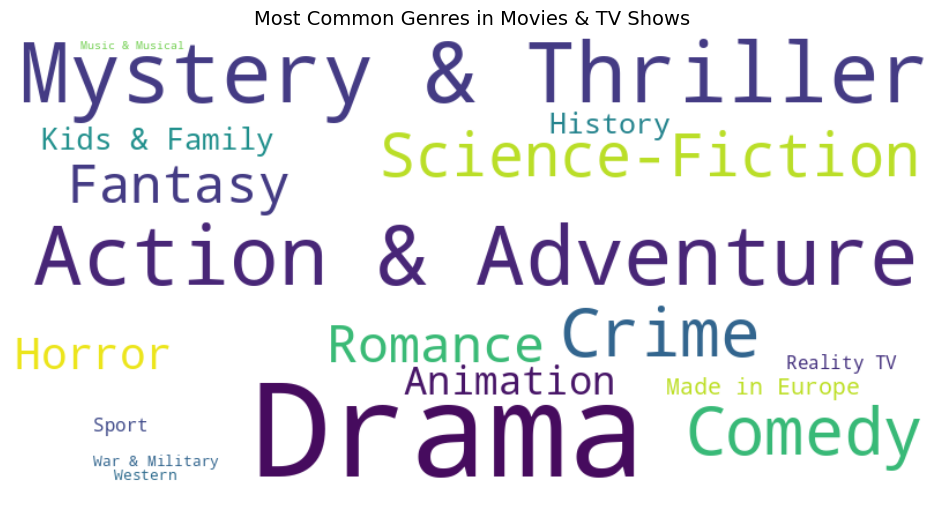

In [ ]:
#Let's Visvalize it using word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(genre_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Genres in Movies & TV Shows", fontsize=14)
plt.show()


## **Finding Predominant Streaming Service**

In [ ]:
# Write Your Code here
from collections import Counter

# Drop missing values and explode the list
all_services = combined_df["Streaming_Service"].dropna().explode()

# Count occurrences of each streaming service
service_counts = pd.Series(Counter(all_services))

# Sort by highest count
top_services = service_counts.sort_values(ascending=False)

print(top_services.head(10))  # Show top 10 streaming services


Amazon Prime Video    100
Amazon Video           31
Netflix.               27
Bookmyshow             26
JioHotstar.            19
Apple TV               19
Netflix                18
Google Play Movies     17
YouTube                17
Zee5                   17
dtype: int64


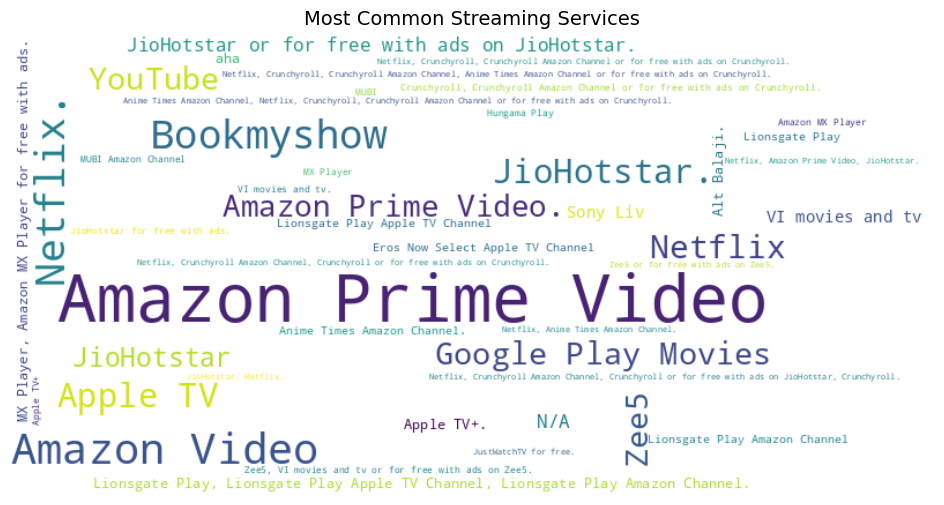

In [ ]:
#Visualizing using Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word cloud from the streaming service frequency data
wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(service_counts)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Hide axes
plt.title("Most Common Streaming Services", fontsize=14)
plt.show()



## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format
combined_df.to_csv("Final_Data_web_Scraping_M2.csv", index=False)
print("✅ Final Data saved successfully as 'Final_Data_web_Scraping_M2.csv'")

✅ Final Data saved successfully as 'Final_Data_web_Scraping_M2.csv'


In [ ]:
#saving filter data as Filter Data in csv format
filtered_df = combined_df[combined_df["IMDB_Rating"] >= 8.0]
filtered_df.to_csv("Filter_Data_web_Scraping_M2.csv", index=False)
print("✅ Filter Data saved successfully as 'Filter_Data_web_Scraping_M2.csv'")

✅ Filter Data saved successfully as 'Filter_Data_web_Scraping_M2.csv'


# **Dataset Drive Link (View Access with Anyone) -**

In [ ]:
Final dataframe- https://drive.google.com/file/d/1qwYxJfi1lu5jxHIUzwiGiJBGVKfzbdGv/view?usp=sharing

Filter Data- https://drive.google.com/file/d/1xddXDokNXOZ97MkEE9dYmyLEWO1RJ2YD/view?usp=sharing

# ***Congratulations!!! You have completed your Assignment.***